In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
import warnings
warnings.filterwarnings("ignore")


In [129]:
df = pd.read_csv("netflix.csv")

In [130]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


### <font color='purple'>1. Defining Problem Statement and Analysing basic metrics</font>

1. **Problem Statement**
  - Analyze the netflix dataset to provide data-driven recommendation on the type of content (movies or TV shows)to produce.
  - Explore how Netflix can expand and grow its business in different countries.
2. **Basic metric Analysis**
  - a. Import the dataset and load it into a suitable data structure for analysis.
    
  - b. Check the data for any missing values,duplicates and handle them .
    
  - c. Analyse the overall distribution of content types(movies,tv.shows) to see it netflix has a preference.
    
  - d. Calculate the total number of movies and tv shows available on Netflix.
    
  - e. Analyze the tv ratings of the content to see if there is a particular rating that performs better.
    
  - f. Determine the average duration (in minutes) of movies and the average number of seasons for TV shows.
3. **Content by country**:
  - a. Analyze which countries produce the most content for Netflix.
    
  - b. Analyze which types of contents are most popular in specific countries.
    
4. **Launch time or date for tv shows and movies**:
  - a. Examine the release dates and time of tv shows to determine if there is a season or time of the year that tends to perform better.
    
5. **Actor and Director Analysis**:
  - a. Identify most polularly appearing actors and directors in Netflix content.
    
  - b. Determine the specific actors and directors are associated with higher ratings.
6. **Focus on TV Shows or Movies**:
  - a. Analyze which types of contents (TV Shows or Movies) is more producing in recent years.
    
7. **Growth Strategies**:
  - a. Provide recommendation for Netflix on expanding its business in different countries based on content prefrences ,regional trends and potential market opportunities.
    
    
    

### <font color='purple'>2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary </font>

In [131]:
print(df.shape)
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

(8807, 12)
Dataset contains 8807 rows and 12 columns


In [132]:
print("Data types of Attribute: ")

print(df.dtypes)

Data types of Attribute: 
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [133]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [134]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

 **Statistical Summery**

In [135]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [136]:
df.describe(include = "object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


- **Missing Value Treatment**

In [137]:
df_missing =  pd.DataFrame({"Missing_values": df.isnull().sum(), "Percentage": round(df.isnull().sum()/len(df)*100, 2)})

In [138]:
df_missing

,Missing_values,Percentage
show_id,0,0.00
type,0,0.00
title,0,0.00
director,2634,29.91
cast,825,9.37
country,831,9.44
date_added,10,0.11
release_year,0,0.00
rating,4,0.05
duration,3,0.03


In [139]:
# fill null values with a specific values:
df['director'].fillna("Unknown director",inplace=True)
df['cast'].fillna("Unknown cast",inplace=True)
df['country'].fillna("Unknown country",inplace=True)
df['date_added'].fillna("January 1,1900",inplace=True)
df['duration'].fillna("Unknown duration",inplace=True)
df['rating'].fillna("Unknown rating",inplace=True)

In [140]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

- When we converted categorical columns to category, internally stores them as integer codes instead of full strings.
- Saves memory by encoding repeated strings as numbers.
- Faster grouping, sorting, and aggregations.
- Prevents invalid category values

In [141]:
df["type"] = df["type"].astype("category")
df["country"] = df["country"].astype("category")
df["rating"] = df["rating"].astype("category")

In [142]:
df.dtypes

show_id           object
type            category
title             object
director          object
cast              object
country         category
date_added        object
release_year       int64
rating          category
duration          object
listed_in         object
description       object
dtype: object

### <font color='purple'>3. Non-Graphical Analysis: Value counts and unique attributes </font>

In [143]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [144]:
df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [198]:
df1[df1["type"] == "TV Show"]["duration"].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

In [145]:
df["country"].value_counts().head()

United States      2818
India               972
Unknown country     831
United Kingdom      419
Japan               245
Name: country, dtype: int64

In [146]:
df["rating"].value_counts()

TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
TV-Y7-FV             6
Unknown rating       4
NC-17                3
UR                   3
74 min               1
84 min               1
66 min               1
Name: rating, dtype: int64

In [147]:
df["listed_in"].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [148]:
df["release_year"].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

### <font color='purple'>4. Visual Analysis - Univariate, Bivariate after pre-processing of the data </font>

In [149]:
# unnesting the columns
df["cast_split"] = df["cast"].str.split(", ")
df = df.explode("cast_split")
df["director_split"] = df["director"].str.split(", ")
df = df.explode("director_split")
df["country_split"] = df["country"].str.split(", ")
df = df.explode("country_split")
df['listed_in_split'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in_split')

In [150]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'cast_split', 'director_split', 'country_split', 'listed_in_split'],
      dtype='object')

In [151]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_split,director_split,country_split,listed_in_split
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown cast,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,International TV Shows
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,TV Dramas
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,TV Mysteries
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown director,South Africa,International TV Shows


In [152]:
df.shape

(201991, 16)

In [153]:
small_df=df[['show_id','title','release_year','type']]
small_df.head(5)

,show_id,title,release_year,type
0,s1,Dick Johnson Is Dead,2020,Movie
1,s2,Blood & Water,2021,TV Show
1,s2,Blood & Water,2021,TV Show
1,s2,Blood & Water,2021,TV Show
1,s2,Blood & Water,2021,TV Show


In [154]:
small_df.drop_duplicates(inplace = True)

In [155]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'cast_split', 'director_split', 'country_split', 'listed_in_split'],
      dtype='object')

In [156]:
df["type"].value_counts()

Movie      145843
TV Show     56148
Name: type, dtype: int64

In [157]:
movie_count_by_country = df[df["type"] == "Movie"].groupby("country")["title"].nunique().sort_values(ascending = False)
movie_count_by_country

country
United States                                                2058
India                                                         893
Unknown country                                               440
United Kingdom                                                206
Canada                                                        122
                                                             ... 
Canada, United States, United Kingdom, France, Luxembourg       0
United Kingdom, Australia                                       0
Spain, Germany, Denmark, United States                          0
Chile, Italy                                                    0
Philippines, Singapore, Indonesia                               0
Name: title, Length: 749, dtype: int64

In [158]:
TV_shows_count_country = df[df["type"] == "TV Show"].groupby("country")["title"].nunique().sort_values(ascending = False)
TV_shows_count_country.head(10)

country
United States      760
Unknown country    391
United Kingdom     213
Japan              169
South Korea        158
India               79
Taiwan              68
Canada              59
France              49
Spain               48
Name: title, dtype: int64

In [159]:
df.dtypes

show_id              object
type               category
title                object
director             object
cast                 object
country            category
date_added           object
release_year          int64
rating             category
duration             object
listed_in            object
description          object
cast_split           object
director_split       object
country_split        object
listed_in_split      object
dtype: object

In [160]:
df['date_added'] = df['date_added'].str.replace(',', ', ', regex=False)  # Ensure space after comma
df['date_added'] = df['date_added'].str.replace('  ', ' ', regex=False)  # Remove double spaces
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['week_added'] = df['date_added'].dt.strftime('%Y-%U')


In [161]:
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# Split the 'cast' column to create a list of actors
tv_shows['cast_split'] = tv_shows['cast'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
movies['cast_split'] = movies['cast'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])


In [162]:
all_actors = [actor for i in movies['cast_split'] for actor in i]

actor_counts = pd.Series(all_actors).value_counts().reset_index()
actor_counts.columns = ['Actor', 'Appearances']

top_10_actors = actor_counts.head(11)

print("Top 10 Actors with frequently Appearances in movies:")
print(top_10_actors)

Top 10 Actors with frequently Appearances in movies:
             Actor  Appearances
0     Unknown cast         1328
1    Alfred Molina         1255
2      Liam Neeson         1244
3      Anupam Kher         1122
4      Salma Hayek         1092
5   John Krasinski         1072
6     James Franco         1058
7      Halle Berry         1057
8    Paul Giamatti         1026
9   Shah Rukh Khan         1007
10   Jim Broadbent          998


In [163]:
all_actors = [actor for i in tv_shows["cast_split"] for actor in i]
actor_count = pd.Series(all_actors).value_counts().reset_index()
actor_count.columns = ["Actor", "Appearence"]
print("Top 10 actor with frequency appearence in TV shows")
actor_count.head(11)

Top 10 actor with frequency appearence in TV shows


,Actor,Appearence
0,Takahiro Sakurai,843
1,Unknown cast,818
2,Yuichi Nakamura,732
3,Jun Fukuyama,679
4,Yuki Kaji,674
5,Junichi Suwabe,624
6,Hiroshi Kamiya,608
7,Raúl Méndez,597
8,Daisuke Ono,583
9,André Holland,536


In [164]:
tv_show["director_split"] = tv_show["director"].apply(lambda x:x.split(", ") if isinstance(x, str) else [])
movies["director_split"] = movies["director"].apply(lambda x:x.split(", ") if isinstance(x, str) else [])


In [165]:
all_director = [director for i in movies["director_split"] for director in i]
director_count = pd.Series(all_director).value_counts().reset_index()
director_count.columns = ["director", "appearence"]
print("Top 10 director frequency in appearence")
print(director_count.head(11))

Top 10 director frequency in appearence
                director  appearence
0       Unknown director        1285
1           Roger Allers         935
2             Joann Sfar         700
3          Bill Plympton         700
4             Nina Paley         700
5             Tomm Moore         700
6   Mohammed Saeed Harib         700
7          Joan C. Gratz         700
8            Paul Brizzi         700
9          Gaëtan Brizzi         700
10         Michael Socha         700


In [166]:
all_director = [director for i in tv_show["director_split"] for director in i]
director_count = pd.Series(all_director).value_counts().reset_index()
director_count.columns = ["director", "appearence"]
print("Top 10 director frequency in appearence")
print(director_count.head(11))

Top 10 director frequency in appearence
                 director  appearence
0        Unknown director       49358
1         Damien Chazelle         416
2         Laïla Marrakchi         416
3         Houda Benyamina         416
4               Alan Poul         416
5   Gautham Vasudev Menon         286
6            Priyadarshan         198
7                  Sarjun         198
8     Rathindran R Prasad         198
9            Arvind Swamy         198
10       Karthik Subbaraj         198


In [167]:
genre = df["listed_in"].str.split(", ").explode().str.strip()
genre

0                Documentaries
1       International TV Shows
1                    TV Dramas
1                 TV Mysteries
1       International TV Shows
                 ...          
8806      International Movies
8806          Music & Musicals
8806                    Dramas
8806      International Movies
8806          Music & Musicals
Name: listed_in, Length: 506879, dtype: object

In [168]:
df1 = pd.read_csv("netflix.csv")

In [169]:
df1['director'].fillna("Unknown director" , inplace = True)
df1['cast'].fillna("Unknown cast" , inplace = True)
df1['country'].fillna("Unknown country" , inplace = True)
df1['date_added'].fillna("January 1, 1900" , inplace = True)
df1['rating'].fillna("Unknown rating" , inplace = True)
df1['duration'].fillna("Unknown duration" , inplace = True)
missing_values = df1.isnull().sum()
print("\nMissing Values:")
print(missing_values)
df1["type"] = df1["type"].astype("category")
df1["country"] = df1["country"].astype("category")
df1["rating"] = df1["rating"].astype("category")


Missing Values:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [170]:
df1['date_added'] = pd.to_datetime(df1['date_added'])

# Calculate the difference in days between 'date_added' and 'release_year'
df1['days_to_add'] = (df1['date_added'] - pd.to_datetime(df1['release_year'], format='%Y')).dt.days

# Calculate the mode (most common) value for 'days_to_add'
mode_days_to_add = df1['days_to_add'].mode().iloc[0]

print(f"The most common time duration between release and addition to Netflix is approximately {mode_days_to_add} days.")

The most common time duration between release and addition to Netflix is approximately 334 days.


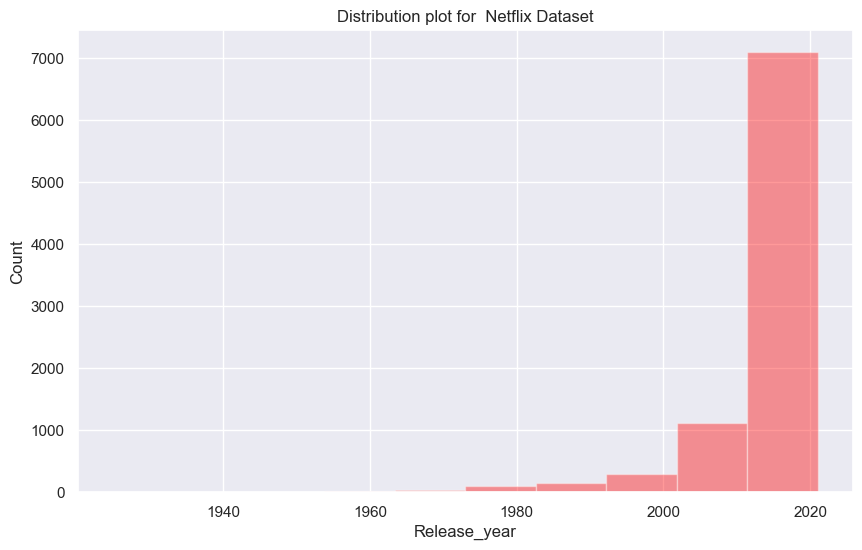

In [171]:
# 1.For continuous variable(s): Distplot, countplot, histogram for univariate analysis

# Distplot for 'release_year'

# Create a distribution plot for rating
plt.figure(figsize=(10,6))
sns.set(style="darkgrid") #set the plot style
sns.distplot(df1['release_year'],bins=10,kde=False,color='red')
# add lebels and a title
plt.xlabel('Release_year')
plt.ylabel('Count')
plt.title('Distribution plot for  Netflix Dataset')
# show the plot
plt.show()

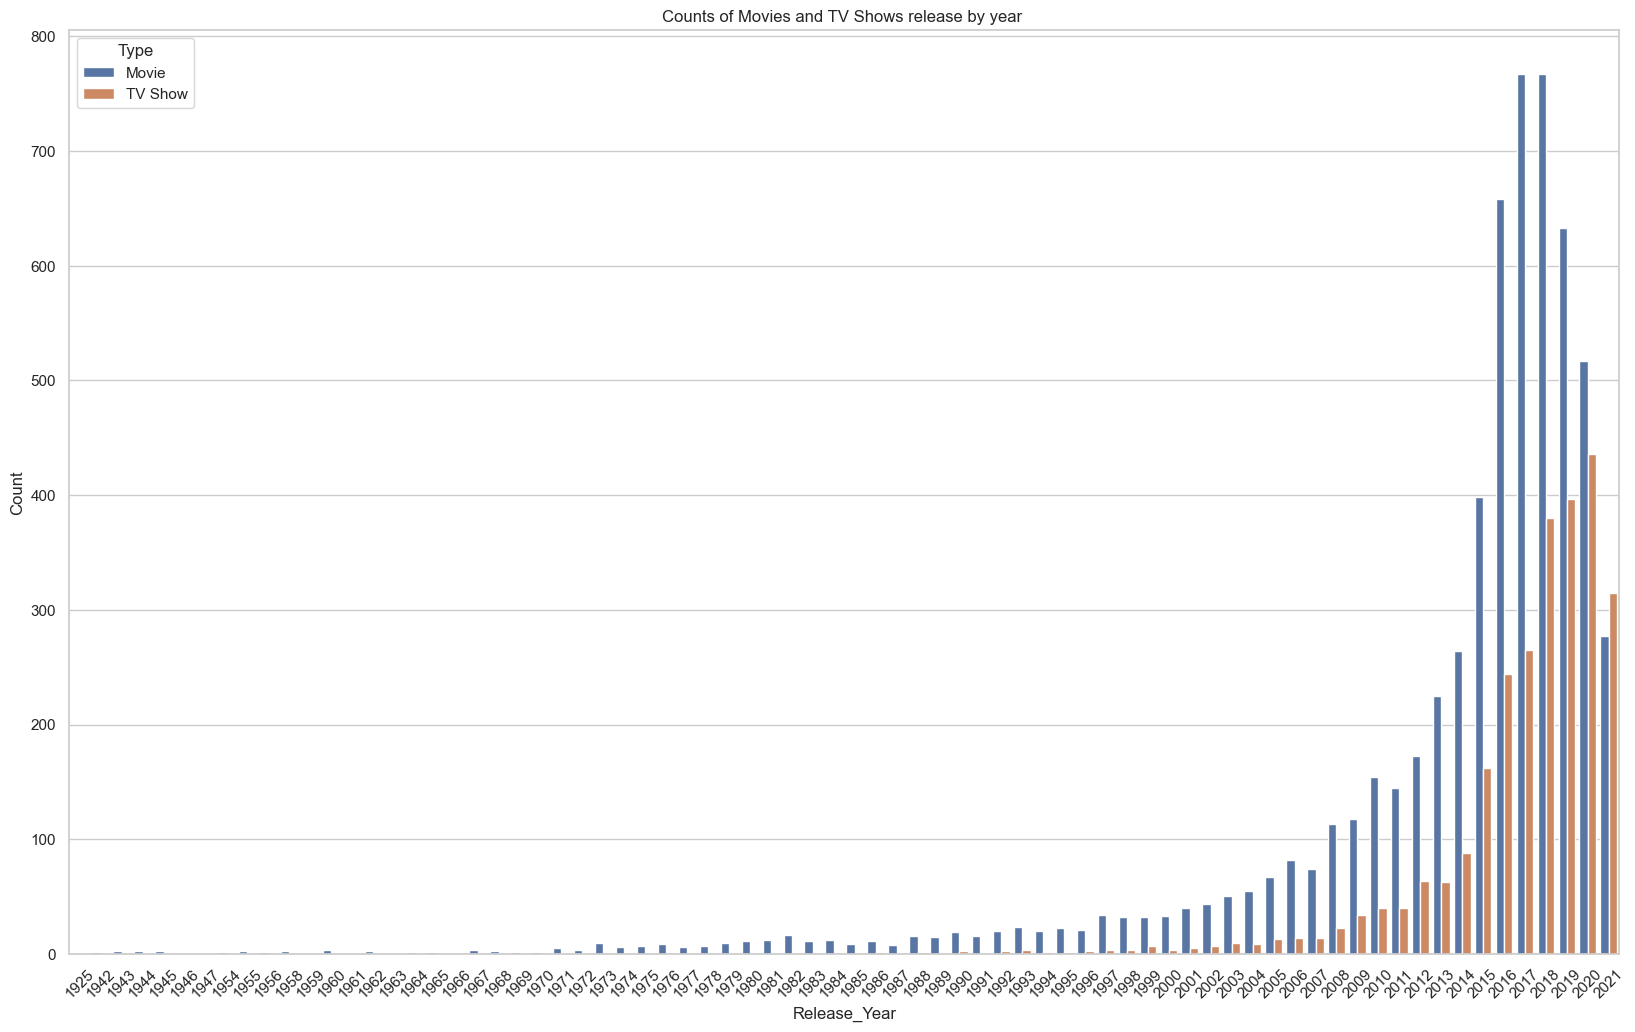

In [173]:
# for countplot

# Create a count plot for the "genre" column
sns.set(style="whitegrid") #set the style for the plot
plt.figure(figsize=(20,12)) #set the figure size 
# Assuming 'Genre'is the name of the categorical variable
sns.countplot(data=small_df,x='release_year',hue='type')
# add lebel and a title
plt.xlabel('Release_Year')
plt.ylabel('Count')
plt.title('Counts of Movies and TV Shows release by year ')
plt.legend(title='Type',loc='upper left',labels=['Movie','TV Show'])
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# show the plot
plt.show()



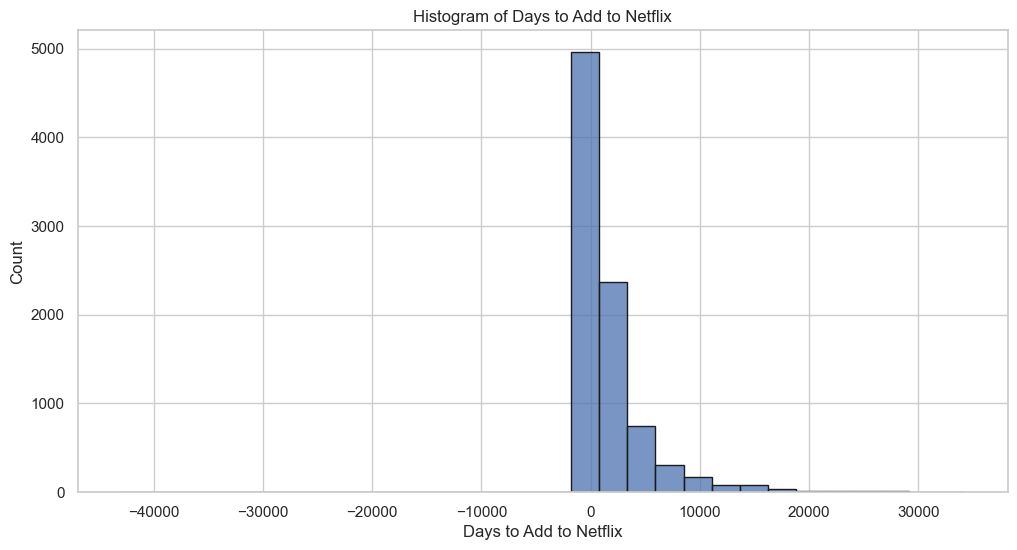

In [176]:
# Histogram for days_to_add 
plt.figure(figsize=(12, 6))
sns.histplot(df1['days_to_add'], bins=30,edgecolor='k')
plt.title('Histogram of Days to Add to Netflix')
plt.xlabel('Days to Add to Netflix')
plt.ylabel('Count')
plt.grid(True)
plt.show()


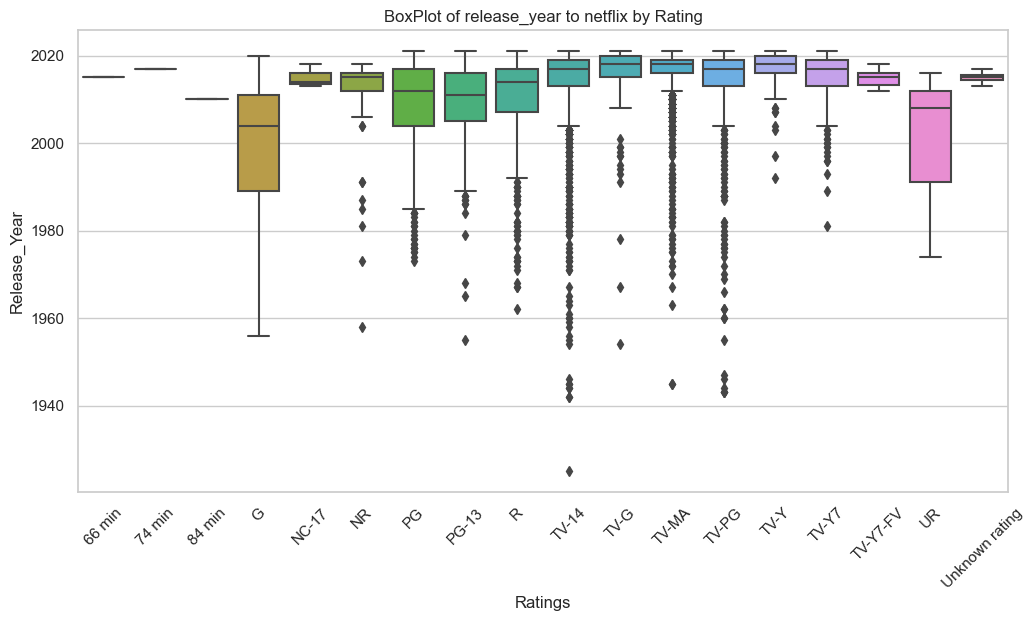

In [177]:
# Boxplot for Categorical Variables
plt.figure(figsize=(12,6))
sns.boxplot(data=df1,x='rating',y='release_year')
plt.title('BoxPlot of release_year to netflix by Rating')
plt.xlabel('Ratings')
plt.ylabel('Release_Year')
plt.xticks(rotation=45) 
plt.show()

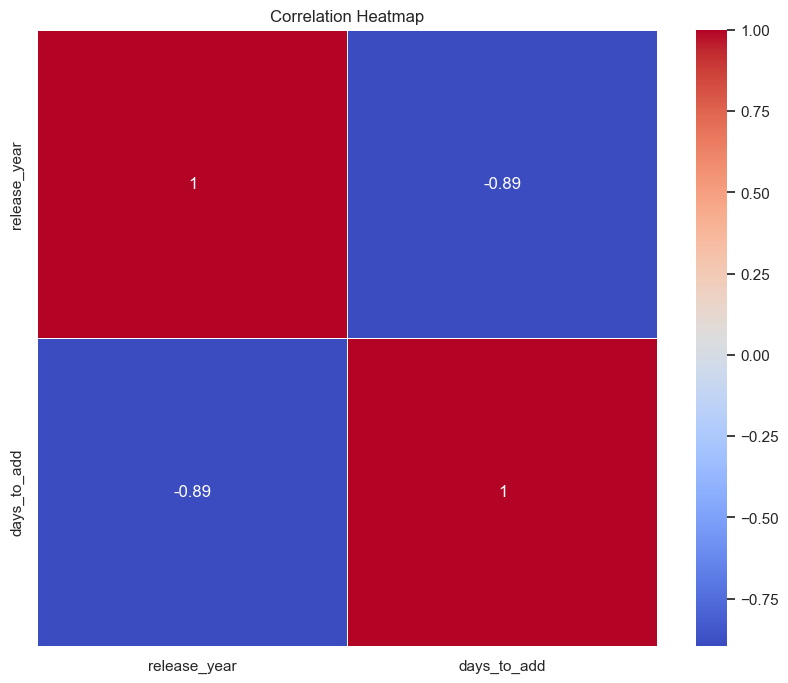

In [178]:
# Correlation Analysis
# Calculate the correlation matrix
correlation_matrix=df1.corr()
# Heatmap to visualize the correlations
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- Pair plot - It creates a grid of plots showing how each variable in the dataset relates to every other variable.
- Explore relationships between multiple numerical variables.
- Visualize distributions of individual variables.

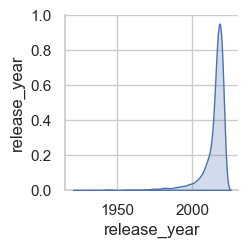

In [179]:
# Pairplot for selected numeric columns
import seaborn as sns
numeric_cols=['release_year','date_added']
sns.pairplot(df1[numeric_cols],diag_kind='kde')
plt.show()

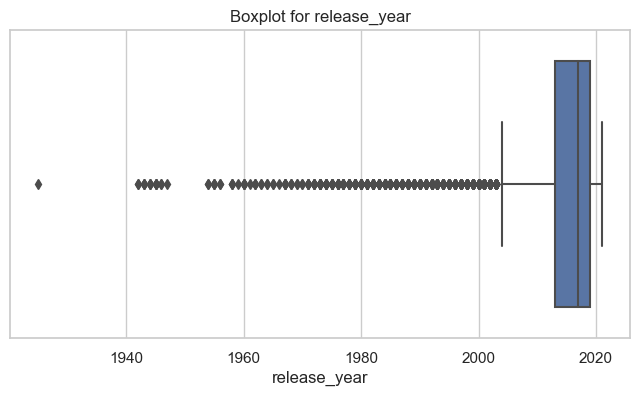

In [180]:
# Check for Outlier
plt.figure(figsize=(8,4))
sns.boxplot(x='release_year',data=df1)
plt.title('Boxplot for release_year')
plt.show()

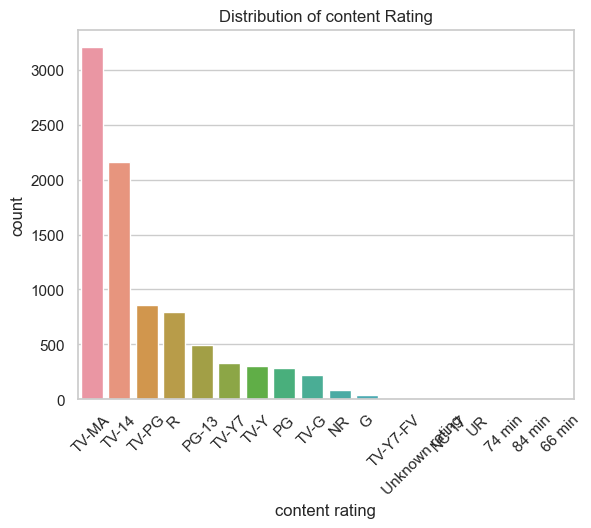

In [184]:
sns.countplot(x='rating',data=df1,order=df1['rating'].value_counts().index)
plt.title('Distribution of content Rating')
plt.xlabel('content rating')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

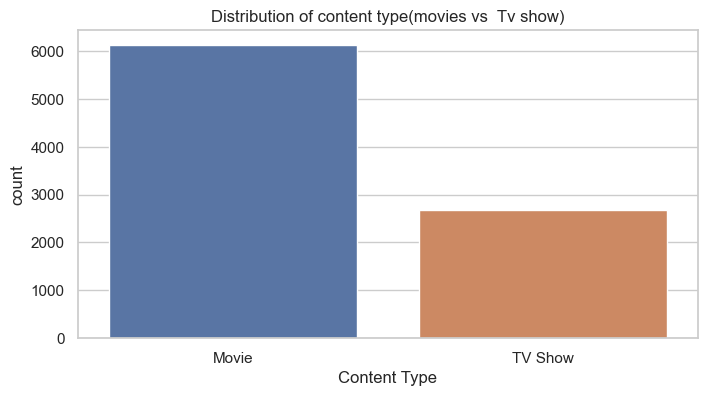

In [185]:
# Distribution of Content Type(Movies vs show)
plt.figure(figsize=(8,4))
sns.countplot(x='type',data=df1)
plt.title('Distribution of content type(movies vs  Tv show)')
plt.xlabel('Content Type')
plt.ylabel('count')
plt.show()

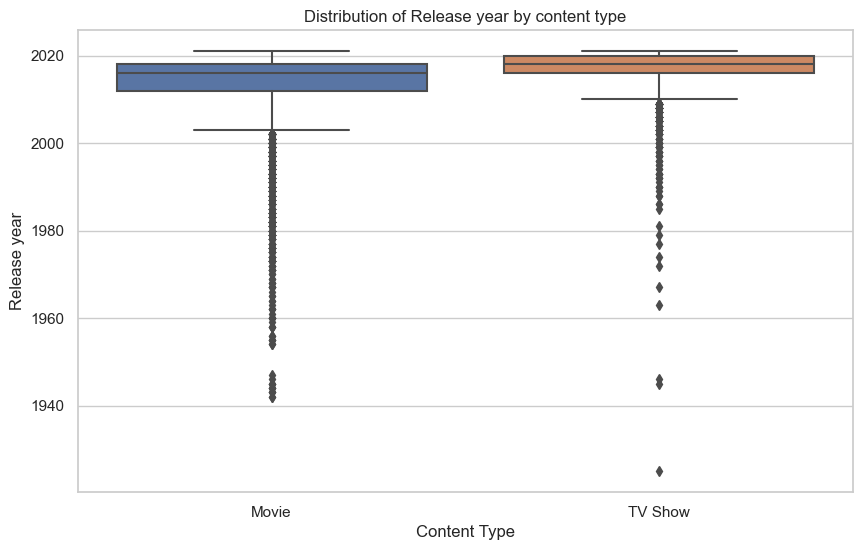

In [186]:
# Content Type and release year
plt.figure(figsize=(10,6))
sns.boxplot(x='type',y='release_year',data=df1)
plt.title('Distribution of Release year by content type')
plt.xlabel('Content Type')
plt.ylabel('Release year')
plt.show()

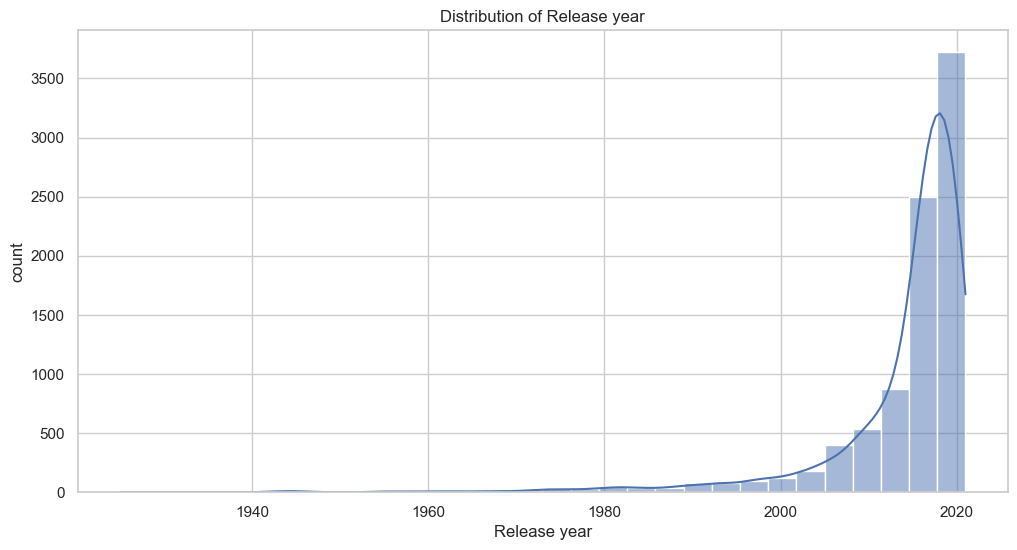

In [187]:
plt.figure(figsize=(12,6))
sns.histplot(x='release_year',bins=30,kde=True,data=df1)
plt.title('Distribution of Release year')
plt.xlabel('Release year')
plt.ylabel('count')
plt.show()

 ### <font color='purple'>6. Insights based on Non-Graphical and Visual Analysis </font>
- 1 Comments on the range of attributes

- 2 Comments on the distribution of the variables and relationship between them

- 3 Comments for each univariate and bivariate plot

In [189]:
# Comments on the range of attributes date_added $ release_year

# For the date_added attributes:
# extract the minimum and maximum dates
min_date=df1['date_added'].min()
max_date=df1['date_added'].max()

In [190]:
# Print the result
print('Minimum Date:',min_date)
print('Maximum Date:',max_date)


Minimum Date: 1900-01-01 00:00:00
Maximum Date: 2021-09-25 00:00:00


In [191]:
# Find the minimum and maximum years
min_year=df1['release_year'].min()
max_year=df1['release_year'].max()


In [192]:
# Print the results
print("Minimum year:", min_year)
print("Maximum year:", max_year)

Minimum year: 1925
Maximum year: 2021


In [193]:
# 2 Comments on the distribution of the variables and relationship between them


In [194]:
# for rating_distribution
ratings_distribution=df1['rating'].describe()
ratings_distribution

count      8807
unique       18
top       TV-MA
freq       3207
Name: rating, dtype: object

In [195]:
# For release_year distribution

release_year_distribution=df1['release_year'].value_counts().sort_index()
release_year_distribution

1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, Length: 74, dtype: int64

In [204]:
df["country"].value_counts().sort_values(ascending = False).head(6)

United States      42002
India              21372
Unknown country    11897
Japan               7026
United Kingdom      5353
South Korea         4306
Name: country, dtype: int64

In [214]:
df["Listed_split"] = df["listed_in"].str.split(", ")

In [219]:
df["Listed_split"].explode().value_counts().head(7)

Dramas                    75504
International Movies      75053
Comedies                  50256
International TV Shows    35356
Action & Adventure        28296
Independent Movies        27096
TV Dramas                 23356
Name: Listed_split, dtype: int64

 ### <font color='purple'>7. Business Insights - Should include patterns observed in the data along with what you can infer from it </font>


- 1. Netflix has two primary content types — Movies and TV Shows. Typically, Movies make up around 65–70% of the catalog, while TV Shows comprise the rest.
- 2. Most content has been added after 2015, especially a large spike around 2018–2021.The release year and date added don’t always match — many shows were released earlier but added later.
- 3. Top contributing countries are United States, India, United Kingdom, Japan, and South Korea.
- 4. Top contributing countries are United States, India, United Kingdom, Japan, and South Korea.
- 5. Most titles fall under TV-MA, TV-14, and R ratings — indicating mature audiences dominate the platform.
- 6. Common genres include Dramas, International Movies, Comedies, International TV Shows.
- 7. Movies: Average runtime ~90 minutes, TV Shows: Most have 1–3 seasons.
- 8. The number of titles added increased sharply around 2019–2020, possibly due to global lockdowns.

### <font color = "purple" > 8. Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand </font>

- 1. Most titles are rated for adults. Introduce more PG and G-rated shows to attract families and children.
- 2. Invest in local language shows and movies from countries like India, Japan, and South Korea to grow regional subscriber bases.
- 3. Create short, quick-watch episodes or mini-movies to keep users engaged during breaks or commutes.
- 4. Documentaries are popular — continue producing more true-crime, nature, and social issue documentaries.
- 5. Collaborate with regional directors and production houses to bring diverse, authentic stories.
- 6. Ensure every show has director, cast, and country details for better recommendations and user trust.
- 7. Regularly review viewing data to understand changing audience interests and adjust the content plan accordingly.